In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

lang = 'english'

In [2]:
reddit = pd.read_csv("../../../Data/Final Dataset /Reddit/Reddit_Final.csv")

print(reddit.head())

            Author  Timestamp  \
0    KuntaWuKnicks  5 mo. ago   
1  Ikewiththebeard  5 mo. ago   
2    JamesJakes000  5 mo. ago   
3         XscytheD  5 mo. ago   
4             muws  5 mo. ago   

                                             Comment  \
0  Can I make it louderOr customize the sound, no...   
1             Customisable sound would be something!   
2                                Metal gear alert...   
3                                                  !   
4                                      I heard this.   

                      Title  Upvotes  
0  No more waking the wife…    24300  
1  No more waking the wife…    24300  
2  No more waking the wife…    24300  
3  No more waking the wife…    24300  
4  No more waking the wife…    24300  


In [3]:
print(reddit.shape)
print(reddit.columns)

(171358, 5)
Index(['Author', 'Timestamp', 'Comment', 'Title', 'Upvotes'], dtype='object')


In [4]:
reddit_comments = reddit['Comment']
reddit_comments = reddit_comments.str.lower()
reddit_comments = reddit_comments.str.cat(sep=' ')

print(reddit_comments[:100])

can i make it louderor customize the sound, now that would be something customisable sound would be 


In [5]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
reddit_comments = regex.sub('', reddit_comments)

print(reddit_comments[:100])

can i make it louderor customize the sound now that would be something customisable sound would be s


In [6]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')

In [7]:
tokenized_reddit_comments = tokenizer.tokenize(reddit_comments)

print(tokenized_reddit_comments[:100])
print(len(tokenized_reddit_comments))

['can', 'make', 'it', 'louderor', 'customize', 'the', 'sound', 'now', 'that', 'would', 'be', 'something', 'customisable', 'sound', 'would', 'be', 'something', 'metal', 'gear', 'alert', 'heard', 'this', 'my', 'god', 'we', 'are', 'old', 'better', 'get', 'some', 'nanomachines', 'son', 'and', 'colonoscopy', 'and', 'bifocals', 'you', 'can', 'customize', 'any', 'computer', 'sound', 'if', 'youre', 'smart', 'enoughme', 'dont', 'know', 'how', 'but', 'this', 'is', 'reddit', 'its', 'like', 'needing', 'doctor', 'on', 'an', 'airplane', 'somebodys', 'gotta', 'know', 'how', 'to', 'do', 'it', 'here', 'op', 'be', 'like', 'made', 'it', 'the', 'fuck', 'up', 'waiting', 'on', 'the', 'remakes', 'and', 'ports', 'now', 'we', 'gonna', 'wait', 'forever', 'at', 'this', 'point', 'good', 'luck', 'good', 'luck', 'back', 'in', 'my', 'day', 'if', 'we']
4309012


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
lemmatized_reddit_comments = [lemmatizer.lemmatize(token) for token in tokenized_reddit_comments]

print(lemmatized_reddit_comments[:100])
print(len(lemmatized_reddit_comments))

['can', 'make', 'it', 'louderor', 'customize', 'the', 'sound', 'now', 'that', 'would', 'be', 'something', 'customisable', 'sound', 'would', 'be', 'something', 'metal', 'gear', 'alert', 'heard', 'this', 'my', 'god', 'we', 'are', 'old', 'better', 'get', 'some', 'nanomachines', 'son', 'and', 'colonoscopy', 'and', 'bifocals', 'you', 'can', 'customize', 'any', 'computer', 'sound', 'if', 'youre', 'smart', 'enoughme', 'dont', 'know', 'how', 'but', 'this', 'is', 'reddit', 'it', 'like', 'needing', 'doctor', 'on', 'an', 'airplane', 'somebody', 'gotta', 'know', 'how', 'to', 'do', 'it', 'here', 'op', 'be', 'like', 'made', 'it', 'the', 'fuck', 'up', 'waiting', 'on', 'the', 'remake', 'and', 'port', 'now', 'we', 'gonna', 'wait', 'forever', 'at', 'this', 'point', 'good', 'luck', 'good', 'luck', 'back', 'in', 'my', 'day', 'if', 'we']
4309012


In [10]:
stopwords = set(stopwords.words(lang))

In [11]:
cleaned_reddit_comments = [token for token in lemmatized_reddit_comments if token not in stopwords]

print(cleaned_reddit_comments[:100])
print(len(cleaned_reddit_comments))

['make', 'louderor', 'customize', 'sound', 'would', 'something', 'customisable', 'sound', 'would', 'something', 'metal', 'gear', 'alert', 'heard', 'god', 'old', 'better', 'get', 'nanomachines', 'son', 'colonoscopy', 'bifocals', 'customize', 'computer', 'sound', 'youre', 'smart', 'enoughme', 'dont', 'know', 'reddit', 'like', 'needing', 'doctor', 'airplane', 'somebody', 'gotta', 'know', 'op', 'like', 'made', 'fuck', 'waiting', 'remake', 'port', 'gonna', 'wait', 'forever', 'point', 'good', 'luck', 'good', 'luck', 'back', 'day', 'wanted', 'meryl', 'crawled', 'back', 'forth', 'air', 'vent', 'time', 'waiting', 'snake', 'eater', 'msg', 'game', 'played', 'beaten', 'hope', 'keep', 'ape', 'escape', 'mini', 'game', 'get', 'banana', 'skin', 'lol', 'dont', 'fucking', 'cringelord', 'dude', 'everyone', 'else', 'oh', 'good', 'memoriesthis', 'guy', 'old', 'wa', 'original', 'ne', 'game', 'wa', 'released', 'damn', 'game', 'wa']
2424566


In [12]:
freq_dist = FreqDist(cleaned_reddit_comments)

In [13]:
freq_dist.most_common(15)

[('game', 62451),
 ('wa', 33654),
 ('p', 28432),
 ('like', 26791),
 ('one', 18076),
 ('get', 16882),
 ('play', 14379),
 ('time', 14171),
 ('would', 13949),
 ('people', 12727),
 ('even', 11323),
 ('really', 11093),
 ('good', 11068),
 ('ha', 10417),
 ('year', 10283)]

In [14]:
bigrams = ngrams(cleaned_reddit_comments, 2)

print(list(bigrams)[:10])

[('make', 'louderor'), ('louderor', 'customize'), ('customize', 'sound'), ('sound', 'would'), ('would', 'something'), ('something', 'customisable'), ('customisable', 'sound'), ('sound', 'would'), ('would', 'something'), ('something', 'metal')]


In [15]:
bigrams_list = ngrams(cleaned_reddit_comments, 2)
bigram_count = Counter(bigrams_list)

In [16]:
print(bigram_count.most_common(15))

[(('feel', 'like'), 2197), (('p', 'plus'), 1612), (('game', 'wa'), 1570), (('game', 'like'), 1453), (('look', 'like'), 1438), (('play', 'game'), 1373), (('p', 'game'), 1328), (('p', 'p'), 1308), (('god', 'war'), 1251), (('video', 'game'), 1229), (('last', 'u'), 1172), (('open', 'world'), 1026), (('elden', 'ring'), 964), (('dont', 'know'), 939), (('year', 'ago'), 935)]


In [17]:
bigrams, counts = zip(*bigram_count.most_common(20))

In [18]:
bigram_labels = [' '.join(bigram) for bigram in bigrams]

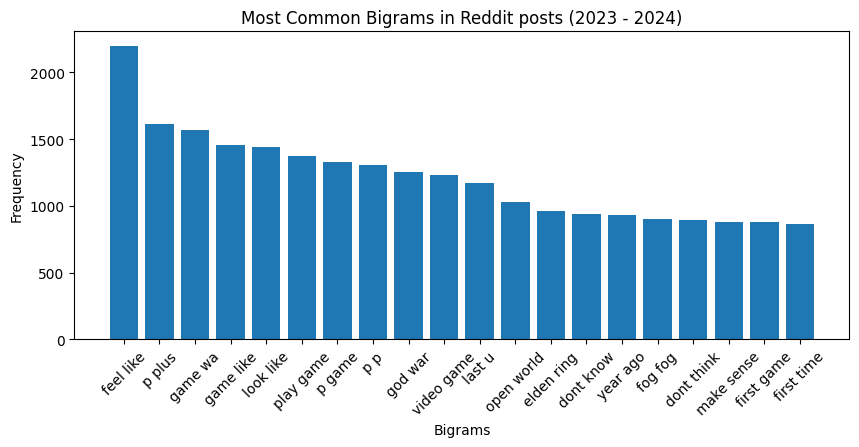

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(bigram_labels, counts)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in Reddit posts (2023 - 2024)')
plt.xticks(rotation=45)
plt.show()